In [2]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

In [3]:
# Load dataset
PROBLEM_NUM = 36
X_path = f"./data_31_40/problem_{PROBLEM_NUM}/dataset_{PROBLEM_NUM}.csv"

df = pd.read_csv(X_path)
print(f"Original dataset shape: {df.shape}")
print(f"Columns: {len(df.columns)}")

Original dataset shape: (10000, 273)
Columns: 273


In [4]:
# Test each column for distribution type
# Use Shapiro-Wilk test for normality and Kolmogorov-Smirnov test for uniformity

uniform_columns = []
normal_columns = []

for col in df.columns:
    # Sample if too large (Shapiro-Wilk has limit)
    sample_size = min(5000, len(df))
    sample_data = df[col].sample(n=sample_size, random_state=42)
    
    # Test for normality (Shapiro-Wilk test)
    # H0: data is normally distributed
    # p-value > 0.05 suggests normal distribution
    _, p_normal = stats.shapiro(sample_data)
    
    # Test for uniformity (Kolmogorov-Smirnov test against uniform distribution)
    # Normalize data to [0, 1] range
    normalized = (sample_data - sample_data.min()) / (sample_data.max() - sample_data.min())
    _, p_uniform = stats.kstest(normalized, 'uniform')
    
    # Classification logic:
    # If p_uniform > 0.05 (fail to reject uniform), consider it uniform
    # If p_normal > 0.05 (fail to reject normal), consider it normal
    # Prioritize uniform classification when both tests pass
    
    if p_uniform > 0.05:
        uniform_columns.append(col)
    elif p_normal > 0.05:
        normal_columns.append(col)

print(f"Uniform columns found: {len(uniform_columns)}")
print(f"Normal columns found: {len(normal_columns)}")
print(f"Other columns: {len(df.columns) - len(uniform_columns) - len(normal_columns)}")

Uniform columns found: 18
Normal columns found: 222
Other columns: 33


In [5]:
# Create dataframe with only uniformly distributed columns
df_uniform = df[uniform_columns]

print("="*80)
print("DATASET WITH ONLY UNIFORMLY DISTRIBUTED COLUMNS")
print("="*80)
print(f"Shape: {df_uniform.shape}")
print(f"Columns retained: {len(uniform_columns)} / {len(df.columns)} ({len(uniform_columns)/len(df.columns)*100:.1f}%)")
print("\n" + "="*80)
print("DATAFRAME:")
print("="*80)
print(df_uniform)
print("\n" + "="*80)
print("COLUMN NAMES:")
print("="*80)
for i, col in enumerate(uniform_columns, 1):
    print(f"{i}. {col}")

DATASET WITH ONLY UNIFORMLY DISTRIBUTED COLUMNS
Shape: (10000, 18)
Columns retained: 18 / 273 (6.6%)

DATAFRAME:
       feat_47   feat_49   feat_55   feat_87   feat_89  feat_128  feat_138  \
0     0.107423  0.419791  0.754407  0.025033  0.574924  0.879201  0.996628   
1     0.880530  0.804836  0.726779  0.496433  0.087172  0.163697  0.646706   
2     0.426896  0.081035  0.784533  0.345960  0.434460  0.630516  0.036089   
3     0.564777  0.515968  0.735824  0.242470  0.225361  0.179799  0.292797   
4     0.491270  0.960297  0.440390  0.274120  0.372117  0.496850  0.803538   
...        ...       ...       ...       ...       ...       ...       ...   
9995  0.764134  0.084038  0.897642  0.807790  0.068038  0.867677  0.865721   
9996  0.374872  0.154382  0.169404  0.292930  0.667230  0.441908  0.960103   
9997  0.280988  0.434094  0.337374  0.383595  0.555912  0.173137  0.928178   
9998  0.249591  0.211285  0.071098  0.386553  0.831665  0.769683  0.321754   
9999  0.683503  0.045718  0.8

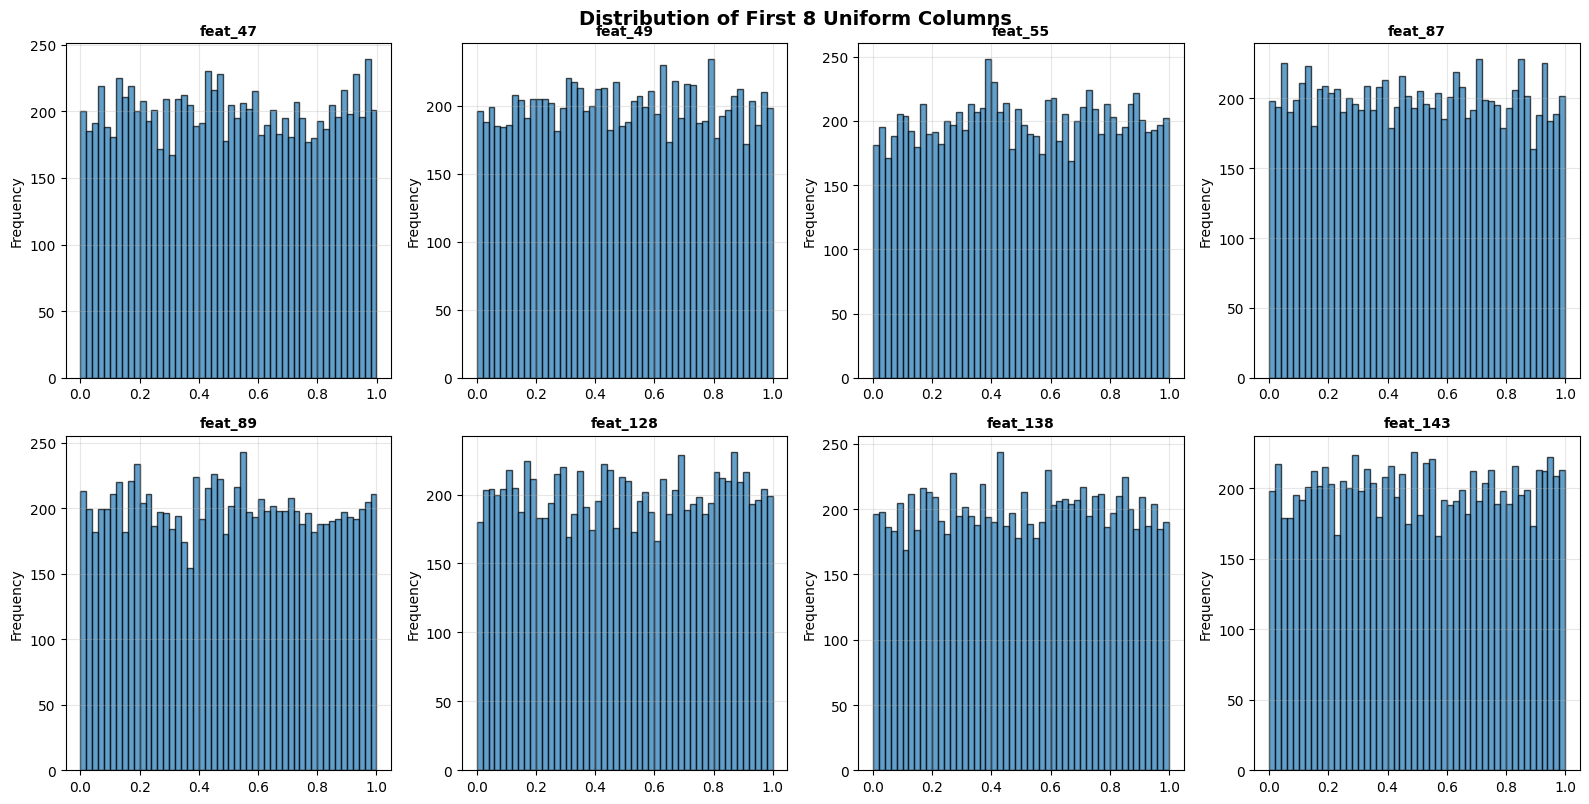

In [6]:
# Visualize distribution of first few uniform columns
n_cols_to_plot = min(8, len(uniform_columns))

if n_cols_to_plot > 0:
    fig, axes = plt.subplots(2, 4, figsize=(16, 8))
    axes = axes.flatten()
    
    for i in range(n_cols_to_plot):
        col = uniform_columns[i]
        axes[i].hist(df_uniform[col], bins=50, edgecolor='black', alpha=0.7)
        axes[i].set_title(f'{col}', fontsize=10, fontweight='bold')
        axes[i].set_ylabel('Frequency')
        axes[i].grid(alpha=0.3)
    
    # Hide unused subplots
    for i in range(n_cols_to_plot, 8):
        axes[i].axis('off')
    
    plt.tight_layout()
    plt.suptitle('Distribution of First 8 Uniform Columns', fontsize=14, fontweight='bold', y=1.00)
    plt.show()
else:
    print("No uniform columns found to visualize.")

CORRELATION ANALYSIS OF UNIFORM FEATURES

Correlation matrix shape: (18, 18)
Number of features: 18

HIGH CORRELATIONS (|r| > 0.7)
No high correlations found (all |r| <= 0.7)


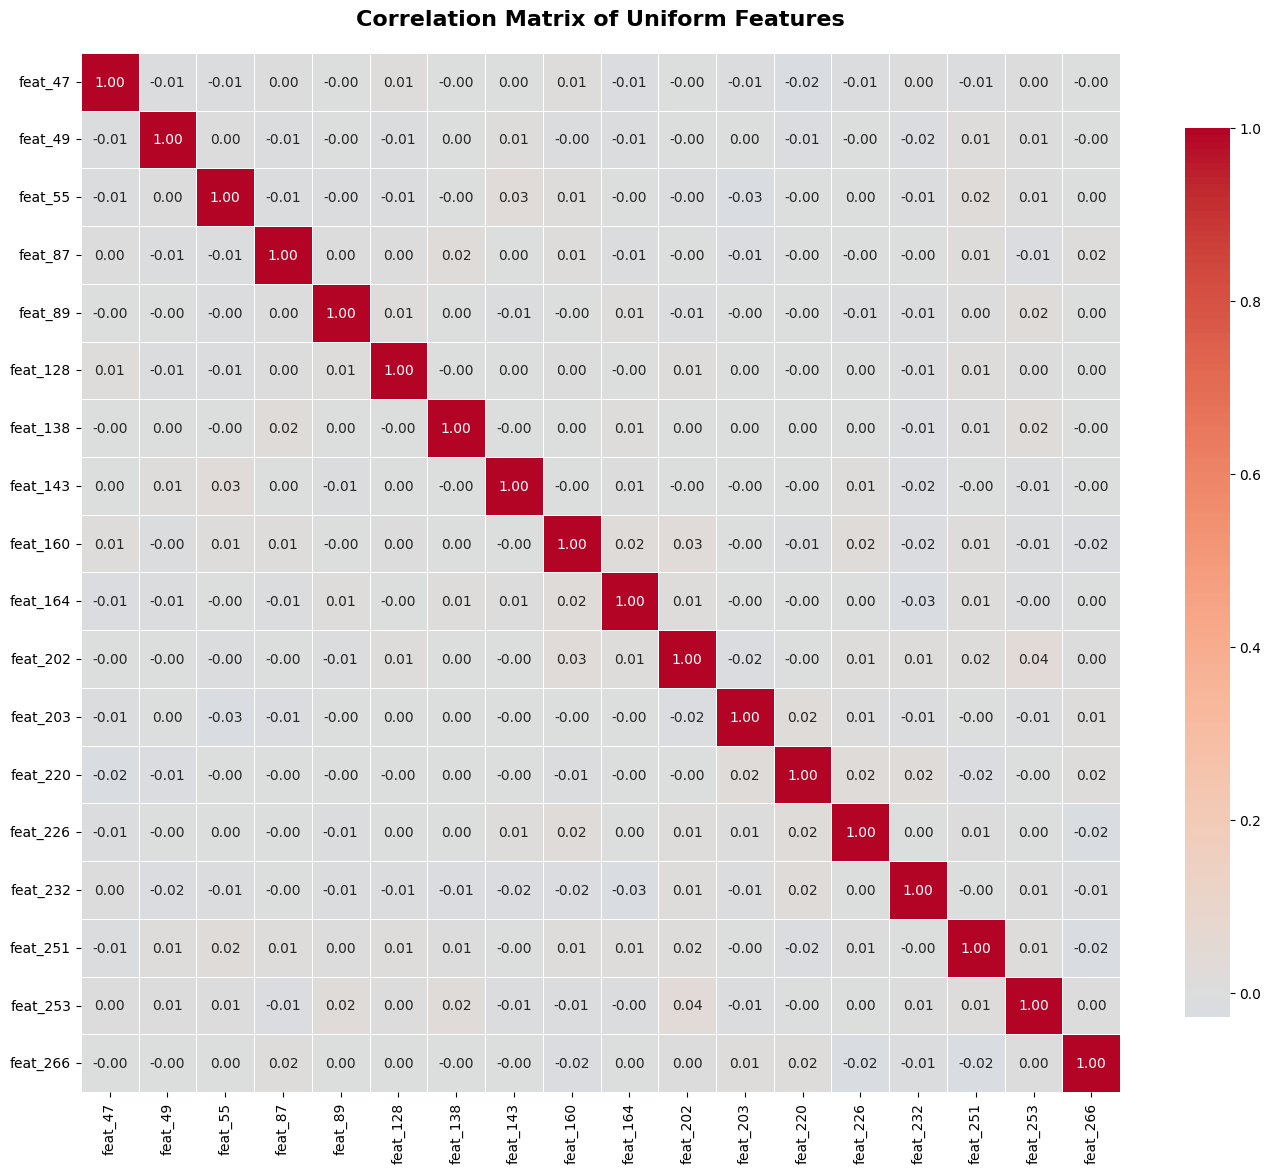


CORRELATION STATISTICS
Mean absolute correlation: 0.0081
Max absolute correlation: 0.0376
Min correlation: -0.0283
Max correlation: 0.0376
Correlations > 0.7: 0
Correlations > 0.5: 0


In [12]:
# Check correlation matrix for uniform features
import seaborn as sns

print("="*80)
print("CORRELATION ANALYSIS OF UNIFORM FEATURES")
print("="*80)

# Compute correlation matrix
corr_matrix = df_uniform.corr()

print(f"\nCorrelation matrix shape: {corr_matrix.shape}")
print(f"Number of features: {len(uniform_columns)}")

# Find high correlations (excluding diagonal)
high_corr_pairs = []
for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        corr_val = corr_matrix.iloc[i, j]
        if abs(corr_val) > 0.7:  # Threshold for high correlation
            high_corr_pairs.append((corr_matrix.columns[i], corr_matrix.columns[j], corr_val))

print(f"\n{'='*80}")
print(f"HIGH CORRELATIONS (|r| > 0.7)")
print(f"{'='*80}")
if high_corr_pairs:
    for feat1, feat2, corr_val in sorted(high_corr_pairs, key=lambda x: abs(x[2]), reverse=True):
        print(f"{feat1:<20} <-> {feat2:<20} : {corr_val:+.4f}")
else:
    print("No high correlations found (all |r| <= 0.7)")

# Visualize correlation matrix
plt.figure(figsize=(14, 12))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0, 
            square=True, linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix of Uniform Features', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

# Summary statistics
print(f"\n{'='*80}")
print(f"CORRELATION STATISTICS")
print(f"{'='*80}")
# Get upper triangle values (excluding diagonal)
upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
correlations = upper_tri.stack().values

print(f"Mean absolute correlation: {np.abs(correlations).mean():.4f}")
print(f"Max absolute correlation: {np.abs(correlations).max():.4f}")
print(f"Min correlation: {correlations.min():.4f}")
print(f"Max correlation: {correlations.max():.4f}")
print(f"Correlations > 0.7: {(np.abs(correlations) > 0.7).sum()}")
print(f"Correlations > 0.5: {(np.abs(correlations) > 0.5).sum()}")
print(f"{'='*80}")

CORRELATION WITH TARGET VARIABLE

Feature correlations with target (sorted by absolute value):
Feature                        Correlation     Abs(Correlation)
feat_143                       -0.164283       0.164283
feat_220                       +0.132731       0.132731
feat_160                       +0.077476       0.077476
feat_266                       +0.071386       0.071386
feat_138                       +0.049843       0.049843
feat_232                       -0.042858       0.042858
feat_203                       +0.041495       0.041495
feat_47                        +0.025350       0.025350
feat_253                       -0.020484       0.020484
feat_251                       -0.014454       0.014454
feat_55                        -0.014113       0.014113
feat_49                        -0.011667       0.011667
feat_87                        -0.010798       0.010798
feat_202                       -0.009411       0.009411
feat_164                       -0.008998       0.008998
f

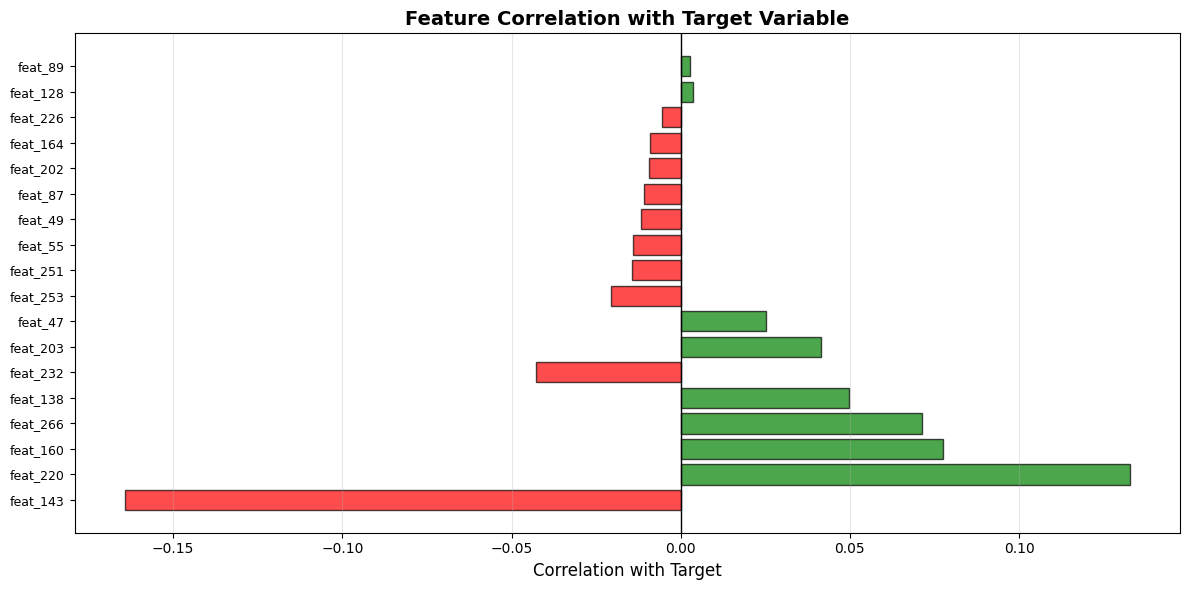


✓ Target correlation analysis complete!


In [13]:
# Check correlation with target variable
y_path = f"./data_31_40/problem_{PROBLEM_NUM}/target_{PROBLEM_NUM}.csv"
y = pd.read_csv(y_path)
y1 = y["target01"]

print("="*80)
print("CORRELATION WITH TARGET VARIABLE")
print("="*80)

# Compute correlation with target for each uniform feature
target_correlations = []
for col in uniform_columns:
    corr = df_uniform[col].corr(y1)
    target_correlations.append((col, corr))

# Sort by absolute correlation
target_correlations.sort(key=lambda x: abs(x[1]), reverse=True)

print(f"\nFeature correlations with target (sorted by absolute value):")
print(f"{'='*80}")
print(f"{'Feature':<30} {'Correlation':<15} {'Abs(Correlation)':<15}")
print(f"{'='*80}")
for feat, corr in target_correlations:
    print(f"{feat:<30} {corr:+.6f} {abs(corr):>14.6f}")

# Summary
abs_corrs = [abs(corr) for _, corr in target_correlations]
print(f"\n{'='*80}")
print(f"CORRELATION WITH TARGET STATISTICS")
print(f"{'='*80}")
print(f"Mean absolute correlation: {np.mean(abs_corrs):.6f}")
print(f"Max absolute correlation: {np.max(abs_corrs):.6f}")
print(f"Min absolute correlation: {np.min(abs_corrs):.6f}")
print(f"Features with |r| > 0.3: {sum(1 for c in abs_corrs if c > 0.3)}")
print(f"Features with |r| > 0.2: {sum(1 for c in abs_corrs if c > 0.2)}")
print(f"Features with |r| > 0.1: {sum(1 for c in abs_corrs if c > 0.1)}")

# Visualize
plt.figure(figsize=(12, 6))
features = [feat for feat, _ in target_correlations]
correlations = [corr for _, corr in target_correlations]

colors = ['red' if corr < 0 else 'green' for corr in correlations]
plt.barh(range(len(features)), correlations, color=colors, alpha=0.7, edgecolor='black')
plt.yticks(range(len(features)), features, fontsize=9)
plt.xlabel('Correlation with Target', fontsize=12)
plt.title('Feature Correlation with Target Variable', fontsize=14, fontweight='bold')
plt.axvline(x=0, color='black', linestyle='-', linewidth=1)
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

print(f"\n✓ Target correlation analysis complete!")

In [14]:
# Separate features by correlation sign
positive_corr_features = [feat for feat, corr in target_correlations if corr > 0]
negative_corr_features = [feat for feat, corr in target_correlations if corr < 0]

print("="*80)
print("FEATURES BY CORRELATION SIGN")
print("="*80)
print(f"\nPositive correlation features: {len(positive_corr_features)}")
for feat in positive_corr_features:
    corr = df_uniform[feat].corr(y1)
    print(f"  {feat:<30} {corr:+.6f}")

print(f"\nNegative correlation features: {len(negative_corr_features)}")
for feat in negative_corr_features:
    corr = df_uniform[feat].corr(y1)
    print(f"  {feat:<30} {corr:+.6f}")
print("="*80)

FEATURES BY CORRELATION SIGN

Positive correlation features: 8
  feat_220                       +0.132731
  feat_160                       +0.077476
  feat_266                       +0.071386
  feat_138                       +0.049843
  feat_203                       +0.041495
  feat_47                        +0.025350
  feat_128                       +0.003564
  feat_89                        +0.002760

Negative correlation features: 10
  feat_143                       -0.164283
  feat_232                       -0.042858
  feat_253                       -0.020484
  feat_251                       -0.014454
  feat_55                        -0.014113
  feat_49                        -0.011667
  feat_87                        -0.010798
  feat_202                       -0.009411
  feat_164                       -0.008998
  feat_226                       -0.005400


In [15]:
# Train model with POSITIVE correlation features only
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from catboost import CatBoostRegressor

print("\n" + "="*80)
print("MODEL 1: POSITIVE CORRELATION FEATURES ONLY")
print("="*80)
print(f"Using {len(positive_corr_features)} features with positive correlation\n")

# Create subsets
df_positive = df_uniform[positive_corr_features]
X_train_pos, X_val_pos, y_train_pos, y_val_pos = train_test_split(
    df_positive, y1, test_size=0.2, random_state=42, shuffle=True
)

print(f"Train: {X_train_pos.shape}, Val: {X_val_pos.shape}\n")

# Train model
model_pos = CatBoostRegressor(
    iterations=1000,
    learning_rate=0.1,
    depth=6,
    random_state=42,
    verbose=0
)

model_pos.fit(
    X_train_pos, y_train_pos,
    eval_set=(X_val_pos, y_val_pos),
    plot=False
)

# Evaluate
y_train_pred_pos = model_pos.predict(X_train_pos)
y_val_pred_pos = model_pos.predict(X_val_pos)

train_rmse_pos = np.sqrt(mean_squared_error(y_train_pos, y_train_pred_pos))
val_rmse_pos = np.sqrt(mean_squared_error(y_val_pos, y_val_pred_pos))
train_r2_pos = r2_score(y_train_pos, y_train_pred_pos)
val_r2_pos = r2_score(y_val_pos, y_val_pred_pos)

print("="*80)
print("RESULTS - POSITIVE CORRELATION FEATURES")
print("="*80)
print(f"{'Metric':<20} {'Train':<15} {'Validation':<15} {'Gap':<15}")
print("="*80)
print(f"{'RMSE':<20} {train_rmse_pos:<15.6f} {val_rmse_pos:<15.6f} {val_rmse_pos - train_rmse_pos:<15.6f}")
print(f"{'R²':<20} {train_r2_pos:<15.6f} {val_r2_pos:<15.6f} {train_r2_pos - val_r2_pos:<15.6f}")
print("="*80)

if val_rmse_pos - train_rmse_pos > 0.05:
    print("\n⚠️ Warning: Overfitting detected (RMSE gap > 0.05)")
else:
    print("\n✓ Good generalization (RMSE gap < 0.05)")


MODEL 1: POSITIVE CORRELATION FEATURES ONLY
Using 8 features with positive correlation

Train: (8000, 8), Val: (2000, 8)

RESULTS - POSITIVE CORRELATION FEATURES
Metric               Train           Validation      Gap            
RMSE                 0.218710        0.225509        0.006799       
R²                   0.082865        0.030572        0.052292       

✓ Good generalization (RMSE gap < 0.05)


In [16]:
# Train model with NEGATIVE correlation features only
print("\n" + "="*80)
print("MODEL 2: NEGATIVE CORRELATION FEATURES ONLY")
print("="*80)
print(f"Using {len(negative_corr_features)} features with negative correlation\n")

# Create subsets
df_negative = df_uniform[negative_corr_features]
X_train_neg, X_val_neg, y_train_neg, y_val_neg = train_test_split(
    df_negative, y1, test_size=0.2, random_state=42, shuffle=True
)

print(f"Train: {X_train_neg.shape}, Val: {X_val_neg.shape}\n")

# Train model
model_neg = CatBoostRegressor(
    iterations=1000,
    learning_rate=0.1,
    depth=6,
    random_state=42,
    verbose=0
)

model_neg.fit(
    X_train_neg, y_train_neg,
    eval_set=(X_val_neg, y_val_neg),
    plot=False
)

# Evaluate
y_train_pred_neg = model_neg.predict(X_train_neg)
y_val_pred_neg = model_neg.predict(X_val_neg)

train_rmse_neg = np.sqrt(mean_squared_error(y_train_neg, y_train_pred_neg))
val_rmse_neg = np.sqrt(mean_squared_error(y_val_neg, y_val_pred_neg))
train_r2_neg = r2_score(y_train_neg, y_train_pred_neg)
val_r2_neg = r2_score(y_val_neg, y_val_pred_neg)

print("="*80)
print("RESULTS - NEGATIVE CORRELATION FEATURES")
print("="*80)
print(f"{'Metric':<20} {'Train':<15} {'Validation':<15} {'Gap':<15}")
print("="*80)
print(f"{'RMSE':<20} {train_rmse_neg:<15.6f} {val_rmse_neg:<15.6f} {val_rmse_neg - train_rmse_neg:<15.6f}")
print(f"{'R²':<20} {train_r2_neg:<15.6f} {val_r2_neg:<15.6f} {train_r2_neg - val_r2_neg:<15.6f}")
print("="*80)

if val_rmse_neg - train_rmse_neg > 0.05:
    print("\n⚠️ Warning: Overfitting detected (RMSE gap > 0.05)")
else:
    print("\n✓ Good generalization (RMSE gap < 0.05)")


MODEL 2: NEGATIVE CORRELATION FEATURES ONLY
Using 10 features with negative correlation

Train: (8000, 10), Val: (2000, 10)

RESULTS - NEGATIVE CORRELATION FEATURES
Metric               Train           Validation      Gap            
RMSE                 0.211659        0.218720        0.007061       
R²                   0.141050        0.088065        0.052985       

✓ Good generalization (RMSE gap < 0.05)


In [ ]:
# Compare all three models
print("\n" + "="*80)
print("COMPARISON: POSITIVE vs NEGATIVE vs ALL FEATURES")
print("="*80)
print(f"{'Model':<30} {'Features':<10} {'Val R²':<15} {'Val RMSE':<15} {'RMSE Gap':<15}")
print("="*80)
print(f"{'Positive Correlation':<30} {len(positive_corr_features):<10} {val_r2_pos:<15.6f} {val_rmse_pos:<15.6f} {val_rmse_pos - train_rmse_pos:<15.6f}")
print(f"{'Negative Correlation':<30} {len(negative_corr_features):<10} {val_r2_neg:<15.6f} {val_rmse_neg:<15.6f} {val_rmse_neg - train_rmse_neg:<15.6f}")
print("="*80)

# Determine best model
if val_r2_pos > val_r2_neg:
    print(f"\n🏆 Best: Positive correlation features (Val R² = {val_r2_pos:.6f})")
    print(f"   Improvement over negative: ΔR² = {val_r2_pos - val_r2_neg:+.6f}, ΔRMSE = {val_rmse_neg - val_rmse_pos:+.6f}")
else:
    print(f"\n🏆 Best: Negative correlation features (Val R² = {val_r2_neg:.6f})")
    print(f"   Improvement over positive: ΔR² = {val_r2_neg - val_r2_pos:+.6f}, ΔRMSE = {val_rmse_pos - val_rmse_neg:+.6f}")

In [17]:
# SHAP Analysis - Top 20 Most Important Features
import shap

print("="*80)
print("SHAP ANALYSIS - TOP 20 FEATURES FROM UNIFORM COLUMNS")
print("="*80)

# Train model on all uniform features for SHAP analysis
X_train_shap, X_val_shap, y_train_shap, y_val_shap = train_test_split(
    df_uniform, y1, test_size=0.2, random_state=42, shuffle=True
)

print(f"\nTraining model for SHAP analysis...")
print(f"Features: {X_train_shap.shape[1]}")

model_shap = CatBoostRegressor(
    iterations=500,
    learning_rate=0.1,
    depth=6,
    random_state=42,
    verbose=0
)

model_shap.fit(X_train_shap, y_train_shap)
print("✓ Model trained\n")

# Create SHAP explainer
print("Computing SHAP values...")
explainer = shap.TreeExplainer(model_shap)

# Use a subset of data for SHAP calculation (faster)
sample_size = min(2000, len(X_train_shap))
X_sample = X_train_shap.sample(n=sample_size, random_state=42)
shap_values = explainer.shap_values(X_sample)

print(f"✓ SHAP values computed for {sample_size} samples\n")

# Aggregate SHAP values by mean absolute value
shap_importance = np.abs(shap_values).mean(axis=0)

# Create dataframe with feature names and SHAP importance
shap_df = pd.DataFrame({
    'feature': X_train_shap.columns,
    'shap_importance': shap_importance
}).sort_values('shap_importance', ascending=False)

# Display top 20
print("="*80)
print("TOP 20 FEATURES BY SHAP IMPORTANCE")
print("="*80)
print(f"{'Rank':<6} {'Feature':<30} {'SHAP Importance':<20}")
print("="*80)
for i, (idx, row) in enumerate(shap_df.head(20).iterrows(), 1):
    print(f"{i:<6} {row['feature']:<30} {row['shap_importance']:<20.6f}")
print("="*80)

# Summary statistics
print(f"\nSHAP Importance Statistics:")
print(f"  Total features: {len(shap_df)}")
print(f"  Mean importance: {shap_importance.mean():.6f}")
print(f"  Max importance: {shap_importance.max():.6f}")
print(f"  Top 20 cumulative: {shap_df.head(20)['shap_importance'].sum() / shap_importance.sum() * 100:.2f}%")

d:\repositories\Github-MachineLearning\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


SHAP ANALYSIS - TOP 20 FEATURES FROM UNIFORM COLUMNS

Training model for SHAP analysis...
Features: 18
✓ Model trained

Computing SHAP values...
✓ SHAP values computed for 2000 samples

TOP 20 FEATURES BY SHAP IMPORTANCE
Rank   Feature                        SHAP Importance     
1      feat_143                       0.034928            
2      feat_220                       0.026870            
3      feat_232                       0.026751            
4      feat_253                       0.023757            
5      feat_266                       0.014924            
6      feat_160                       0.013901            
7      feat_138                       0.010835            
8      feat_203                       0.009392            
9      feat_49                        0.008457            
10     feat_47                        0.008404            
11     feat_202                       0.007935            
12     feat_251                       0.007602            
13     feat_

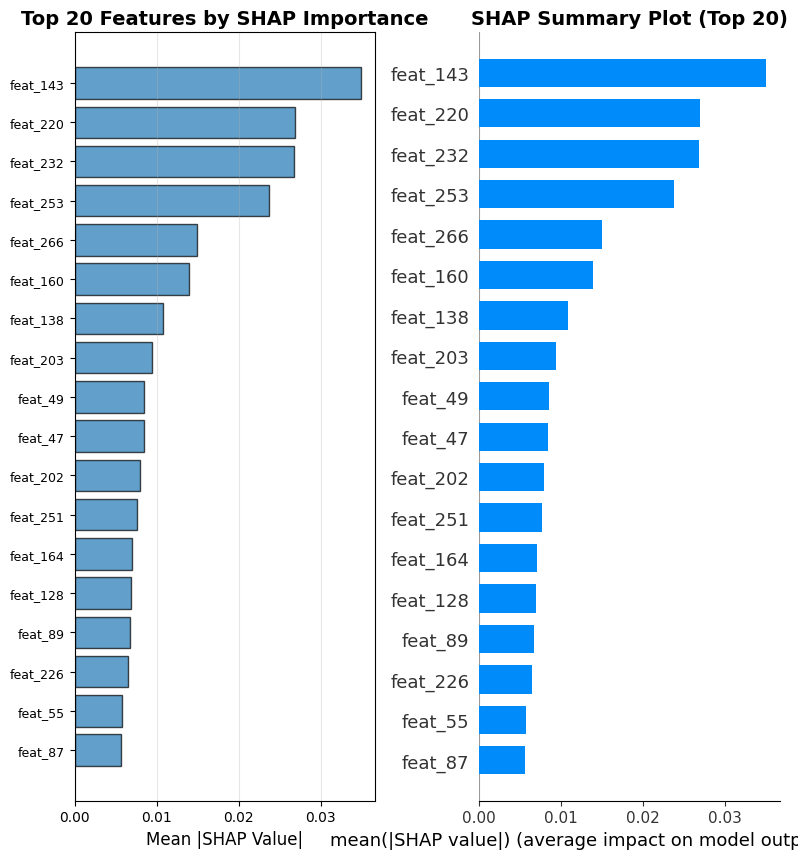


✓ SHAP visualization complete!


In [18]:
# Visualize SHAP importance
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Bar plot of top 20
top_20_shap = shap_df.head(20)
axes[0].barh(range(len(top_20_shap)), top_20_shap['shap_importance'], alpha=0.7, edgecolor='black')
axes[0].set_yticks(range(len(top_20_shap)))
axes[0].set_yticklabels(top_20_shap['feature'], fontsize=9)
axes[0].set_xlabel('Mean |SHAP Value|', fontsize=12)
axes[0].set_title('Top 20 Features by SHAP Importance', fontsize=14, fontweight='bold')
axes[0].invert_yaxis()
axes[0].grid(axis='x', alpha=0.3)

# SHAP summary plot
shap.summary_plot(shap_values, X_sample, plot_type="bar", max_display=20, show=False)
axes[1].set_title('SHAP Summary Plot (Top 20)', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

print("\n✓ SHAP visualization complete!")

In [22]:
# Train model with top SHAP features
print("\n" + "="*80)
print("MODEL WITH TOP SHAP FEATURES")
print("="*80)

# Select top N features (try different values: 5, 10, 15, 20)
top_n = 10
top_shap_features = shap_df.head(top_n)['feature'].tolist()

print(f"\nUsing top {top_n} SHAP features:")
for i, feat in enumerate(top_shap_features, 1):
    shap_imp = shap_df[shap_df['feature'] == feat]['shap_importance'].values[0]
    print(f"  {i}. {feat:<30} (SHAP: {shap_imp:.6f})")

# Create subsets
df_shap = df_uniform[top_shap_features]
X_train_shap_model, X_val_shap_model, y_train_shap_model, y_val_shap_model = train_test_split(
    df_shap, y1, test_size=0.2, random_state=42, shuffle=True
)

print(f"\nTrain: {X_train_shap_model.shape}, Val: {X_val_shap_model.shape}\n")

# Train model
print("Training CatBoost with top SHAP features...")
model_shap_pred = CatBoostRegressor(
    iterations=1000,
    learning_rate=0.1,
    depth=6,
    random_state=42,
    verbose=100
)

model_shap_pred.fit(
    X_train_shap_model, y_train_shap_model,
    eval_set=(X_val_shap_model, y_val_shap_model),
    plot=False
)

print("\n" + "="*80)
print("Training Complete!")
print("="*80)


MODEL WITH TOP SHAP FEATURES

Using top 10 SHAP features:
  1. feat_143                       (SHAP: 0.034928)
  2. feat_220                       (SHAP: 0.026870)
  3. feat_232                       (SHAP: 0.026751)
  4. feat_253                       (SHAP: 0.023757)
  5. feat_266                       (SHAP: 0.014924)
  6. feat_160                       (SHAP: 0.013901)
  7. feat_138                       (SHAP: 0.010835)
  8. feat_203                       (SHAP: 0.009392)
  9. feat_49                        (SHAP: 0.008457)
  10. feat_47                        (SHAP: 0.008404)

Train: (8000, 10), Val: (2000, 10)

Training CatBoost with top SHAP features...
0:	learn: 0.2266411	test: 0.2273270	best: 0.2273270 (0)	total: 3.2ms	remaining: 3.2s
100:	learn: 0.2002712	test: 0.2151491	best: 0.2147525 (61)	total: 281ms	remaining: 2.5s
200:	learn: 0.1880438	test: 0.2165483	best: 0.2147525 (61)	total: 512ms	remaining: 2.03s
300:	learn: 0.1774936	test: 0.2176809	best: 0.2147525 (61)	total: 7

In [23]:
# Evaluate model with top SHAP features
y_train_pred_shap = model_shap_pred.predict(X_train_shap_model)
y_val_pred_shap = model_shap_pred.predict(X_val_shap_model)

train_rmse_shap = np.sqrt(mean_squared_error(y_train_shap_model, y_train_pred_shap))
val_rmse_shap = np.sqrt(mean_squared_error(y_val_shap_model, y_val_pred_shap))
train_r2_shap = r2_score(y_train_shap_model, y_train_pred_shap)
val_r2_shap = r2_score(y_val_shap_model, y_val_pred_shap)

print("\n" + "="*80)
print(f"MODEL PERFORMANCE - TOP {top_n} SHAP FEATURES")
print("="*80)
print(f"{'Metric':<20} {'Train':<15} {'Validation':<15} {'Gap':<15}")
print("="*80)
print(f"{'RMSE':<20} {train_rmse_shap:<15.6f} {val_rmse_shap:<15.6f} {val_rmse_shap - train_rmse_shap:<15.6f}")
print(f"{'R²':<20} {train_r2_shap:<15.6f} {val_r2_shap:<15.6f} {train_r2_shap - val_r2_shap:<15.6f}")
print("="*80)

if val_rmse_shap - train_rmse_shap > 0.05:
    print("\n⚠️ Warning: Overfitting detected (RMSE gap > 0.05)")
else:
    print("\n✓ Good generalization (RMSE gap < 0.05)")

print(f"\n📊 Summary:")
print(f"   Features used: {top_n} / {len(uniform_columns)} uniform features ({top_n/len(uniform_columns)*100:.1f}%)")
print(f"   Feature selection: Top SHAP importance")
print(f"   Validation R²: {val_r2_shap:.6f}")
print(f"   Validation RMSE: {val_rmse_shap:.6f}")

# Compare with previous models
print(f"\n" + "="*80)
print("COMPARISON WITH OTHER MODELS")
print("="*80)
print(f"{'Model':<35} {'Features':<10} {'Val R²':<15} {'Val RMSE':<15}")
print("="*80)
print(f"{'Positive Correlation Only':<35} {len(positive_corr_features):<10} {val_r2_pos:<15.6f} {val_rmse_pos:<15.6f}")
print(f"{'Negative Correlation Only':<35} {len(negative_corr_features):<10} {val_r2_neg:<15.6f} {val_rmse_neg:<15.6f}")
print(f"{'Top SHAP Features':<35} {top_n:<10} {val_r2_shap:<15.6f} {val_rmse_shap:<15.6f}")
print("="*80)


MODEL PERFORMANCE - TOP 10 SHAP FEATURES
Metric               Train           Validation      Gap            
RMSE                 0.205310        0.214753        0.009443       
R²                   0.191808        0.120846        0.070962       

✓ Good generalization (RMSE gap < 0.05)

📊 Summary:
   Features used: 10 / 18 uniform features (55.6%)
   Feature selection: Top SHAP importance
   Validation R²: 0.120846
   Validation RMSE: 0.214753

COMPARISON WITH OTHER MODELS
Model                               Features   Val R²          Val RMSE       
Positive Correlation Only           8          0.030572        0.225509       
Negative Correlation Only           10         0.088065        0.218720       
Top SHAP Features                   10         0.120846        0.214753       


In [24]:
shap_values

array([[-0.00626203,  0.00329598, -0.00151917, ...,  0.00503192,
         0.03263568, -0.01003573],
       [-0.00774909, -0.00420505,  0.01329472, ..., -0.00120506,
         0.01235567,  0.00032124],
       [-0.00263487,  0.00085557,  0.00608746, ...,  0.0163012 ,
        -0.0170569 , -0.02474933],
       ...,
       [-0.00509067, -0.00279836,  0.0006088 , ..., -0.00295751,
         0.03824645, -0.00854786],
       [-0.0052097 ,  0.00310133,  0.00882485, ..., -0.00592778,
         0.01885665,  0.00378226],
       [-0.0034961 ,  0.00408039,  0.00881973, ..., -0.01191748,
         0.04444029, -0.02147781]], shape=(2000, 18))

In [7]:
# Load target variable and prepare for modeling
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from catboost import CatBoostRegressor

y_path = f"./data_31_40/problem_{PROBLEM_NUM}/target_{PROBLEM_NUM}.csv"
y = pd.read_csv(y_path)
y1 = y["target01"]

print(f"Target shape: {y1.shape}")
print(f"Features shape: {df_uniform.shape}")

# Create train/validation split
X_train, X_val, y_train, y_val = train_test_split(
    df_uniform, y1, test_size=0.2, random_state=42, shuffle=True
)

print(f"\nTrain/Val Split:")
print(f"X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"X_val: {X_val.shape}, y_val: {y_val.shape}")

Target shape: (10000,)
Features shape: (10000, 18)

Train/Val Split:
X_train: (8000, 18), y_train: (8000,)
X_val: (2000, 18), y_val: (2000,)


In [10]:
# Train CatBoost with uniformly distributed columns only
print("="*80)
print("TRAINING CATBOOST WITH UNIFORM COLUMNS ONLY")
print("="*80)
print(f"Using {len(uniform_columns)} uniformly distributed features\n")

model = CatBoostRegressor(
    iterations=1000,
    learning_rate=0.1,
    depth=6,
    random_state=42,
    verbose=100
)

model.fit(
    X_train, y_train,
    eval_set=(X_val, y_val),
    # early_stopping_rounds=50,
    plot=False
)

print("\n" + "="*80)
print("Training Complete!")
print("="*80)

TRAINING CATBOOST WITH UNIFORM COLUMNS ONLY
Using 18 uniformly distributed features

0:	learn: 0.2265584	test: 0.2272280	best: 0.2272280 (0)	total: 3.56ms	remaining: 3.56s
100:	learn: 0.1991536	test: 0.2144617	best: 0.2142908 (80)	total: 322ms	remaining: 2.87s
200:	learn: 0.1837946	test: 0.2154491	best: 0.2142908 (80)	total: 591ms	remaining: 2.35s
300:	learn: 0.1705411	test: 0.2168676	best: 0.2142908 (80)	total: 853ms	remaining: 1.98s
400:	learn: 0.1589053	test: 0.2191920	best: 0.2142908 (80)	total: 1.12s	remaining: 1.67s
500:	learn: 0.1480577	test: 0.2206523	best: 0.2142908 (80)	total: 1.39s	remaining: 1.38s
600:	learn: 0.1382237	test: 0.2216398	best: 0.2142908 (80)	total: 1.69s	remaining: 1.12s
700:	learn: 0.1298734	test: 0.2222482	best: 0.2142908 (80)	total: 1.95s	remaining: 832ms
800:	learn: 0.1218671	test: 0.2234154	best: 0.2142908 (80)	total: 2.19s	remaining: 543ms
900:	learn: 0.1147188	test: 0.2237057	best: 0.2142908 (80)	total: 2.43s	remaining: 267ms
999:	learn: 0.1080676	test:

In [11]:
# Evaluate model performance
y_train_pred = model.predict(X_train)
y_val_pred = model.predict(X_val)

train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
val_rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))
train_r2 = r2_score(y_train, y_train_pred)
val_r2 = r2_score(y_val, y_val_pred)

print("\n" + "="*80)
print("MODEL PERFORMANCE (UNIFORM COLUMNS ONLY)")
print("="*80)
print(f"{'Metric':<20} {'Train':<15} {'Validation':<15} {'Gap':<15}")
print("="*80)
print(f"{'RMSE':<20} {train_rmse:<15.6f} {val_rmse:<15.6f} {val_rmse - train_rmse:<15.6f}")
print(f"{'R²':<20} {train_r2:<15.6f} {val_r2:<15.6f} {train_r2 - val_r2:<15.6f}")
print("="*80)

if val_rmse - train_rmse > 0.05:
    print("\n⚠️ Warning: Model shows signs of overfitting (RMSE gap > 0.05)")
else:
    print("\n✓ Good generalization (RMSE gap < 0.05)")

print(f"\n📊 Summary:")
print(f"   Features used: {len(uniform_columns)} (uniformly distributed only)")
print(f"   Validation RMSE: {val_rmse:.6f}")
print(f"   Validation R²: {val_r2:.6f}")


MODEL PERFORMANCE (UNIFORM COLUMNS ONLY)
Metric               Train           Validation      Gap            
RMSE                 0.202080        0.214291        0.012210       
R²                   0.217033        0.124623        0.092410       

✓ Good generalization (RMSE gap < 0.05)

📊 Summary:
   Features used: 18 (uniformly distributed only)
   Validation RMSE: 0.214291
   Validation R²: 0.124623
